In [1]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from kneed import KneeLocator


# print the graphs in the notebook
%matplotlib inline

# set seaborn style to white
sns.set_style("white")

sns.set_theme()

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("customer_data.csv")
df.head()

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780


In [5]:
df.dtypes

name                   object
age                     int64
gender                 object
education              object
income                  int64
country                object
purchase_frequency    float64
spending              float64
dtype: object

In [6]:
df.education.value_counts()

Bachelor       271
PhD            248
High School    245
Master         236
Name: education, dtype: int64

In [7]:
df.gender.value_counts()

Male      501
Female    499
Name: gender, dtype: int64

In [8]:
df.country.nunique()

239

In [9]:
df.isna().sum()

name                  0
age                   0
gender                0
education             0
income                0
country               0
purchase_frequency    0
spending              0
dtype: int64

<AxesSubplot:ylabel='age'>

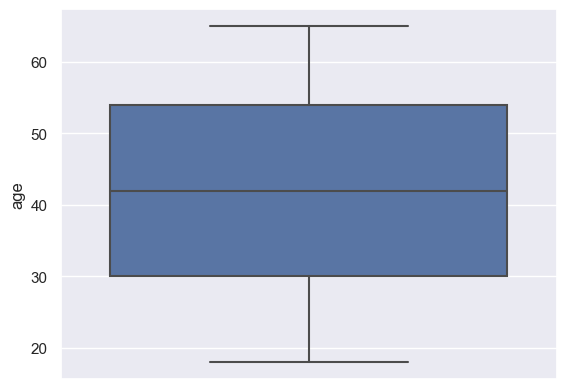

In [10]:
sns.boxplot(y=df.age)

<AxesSubplot:ylabel='purchase_frequency'>

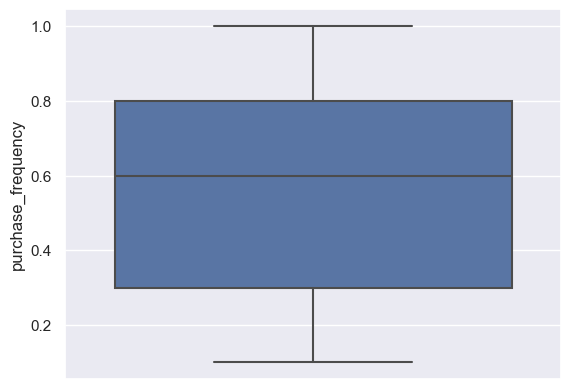

In [11]:
sns.boxplot(y=df.purchase_frequency)

<AxesSubplot:xlabel='spending', ylabel='Count'>

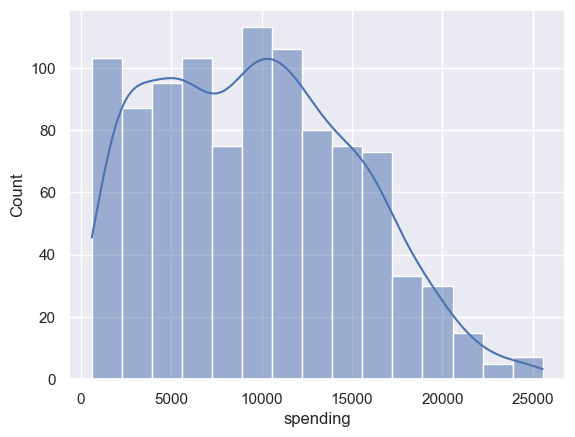

In [13]:
sns.histplot(df.spending, kde=True)

In [22]:
df = df.join(pd.get_dummies(df.gender)).drop('gender',axis=1)

In [23]:
df = df.join(pd.get_dummies(df.education)).drop('education',axis=1)
df

,name,age,income,country,purchase_frequency,spending,Female,Male,Bachelor,High School,Master,PhD
0,Teresa Williams MD,42,53936,Slovenia,0.9,13227.120,1,0,0,1,0,0
1,Christine Myers,49,82468,Aruba,0.6,12674.040,1,0,0,0,1,0
2,Dwayne Moreno,55,56941,Cyprus,0.3,5354.115,0,1,1,0,0,0
3,Amy Norton,24,60651,Palau,0.2,2606.510,1,0,1,0,0,0
4,Tonya Adams,64,81884,Zambia,0.9,18984.780,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Jason Haas,42,98170,Bosnia and Herzegovina,0.7,17435.950,1,0,0,0,0,1
996,Sharon Valdez,39,59174,Eritrea,0.9,11662.830,0,1,0,1,0,0
997,Andrew Taylor,50,59808,Serbia,0.4,7196.160,0,1,0,0,1,0
998,Jessica Johnson,50,58272,Cyprus,0.7,13939.520,1,0,0,0,1,0


<AxesSubplot:xlabel='purchase_frequency', ylabel='spending'>

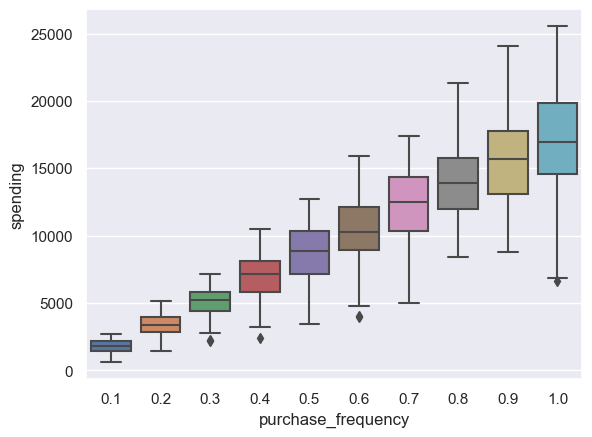

In [21]:
sns.boxplot(x=df.purchase_frequency, y=df.spending)

<AxesSubplot:xlabel='income', ylabel='age'>

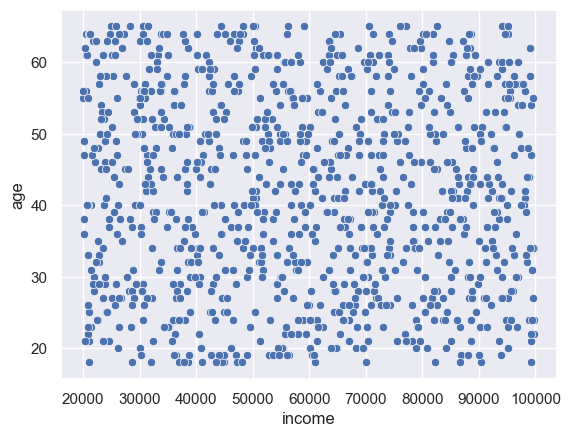

In [26]:
sns.scatterplot(df.income, df.age)

<AxesSubplot:xlabel='purchase_frequency', ylabel='income'>

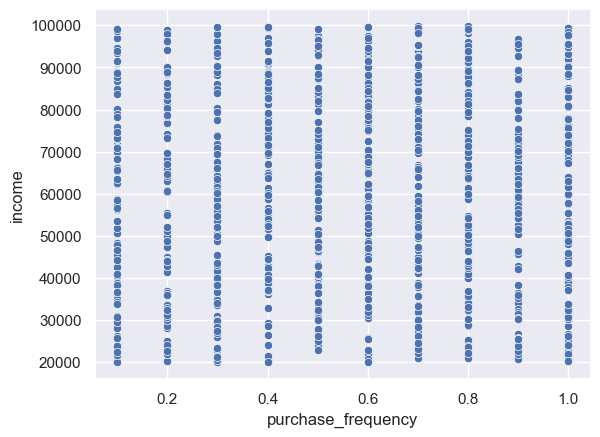

In [28]:
sns.scatterplot(df.purchase_frequency, df.income)

In [44]:
scaler = MinMaxScaler()
df['income'] = scaler.fit_transform(df.income.values.reshape(-1,1))
df['age'] = scaler.fit_transform(df.age.values.reshape(-1,1))
df['spending'] = scaler.fit_transform(df.spending.values.reshape(-1,1))

In [51]:
kmean = KMeans(n_clusters=5)
y_predict = kmean.fit_predict(df[['age','income','purchase_frequency', 'spending', 'Female', 'Male', 'Bachelor', 'High School', 'Master', 'PhD']])

In [55]:
from sklearn.decomposition import PCA
df_num = df[['age','income','purchase_frequency', 'spending', 'Female', 'Male', 'Bachelor', 'High School', 'Master', 'PhD']]
pca = PCA(n_components=2)
pca_df2 = pd.DataFrame(pca.fit_transform(df_num))
pca.explained_variance_

array([0.50238246, 0.26424542])

In [65]:
pca_df2.iloc[:,0]

0     -0.652012
1     -0.726356
2      0.677086
3     -0.727731
4      0.672609
         ...   
995   -0.724653
996    0.760172
997    0.690979
998   -0.729764
999   -0.738694
Name: 0, Length: 1000, dtype: float64

<AxesSubplot:xlabel='0', ylabel='1'>

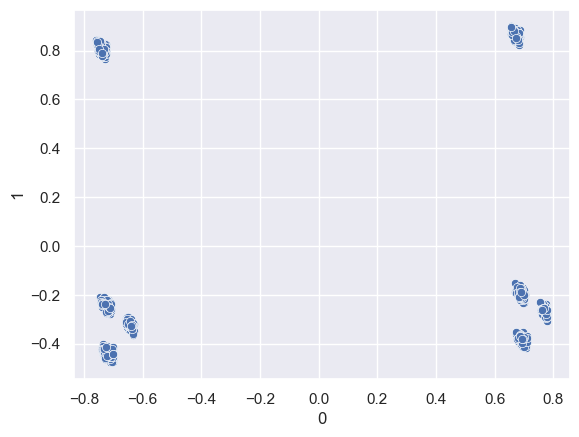

In [66]:
sns.scatterplot(pca_df2.iloc[:,0], pca_df2.iloc[:,1])

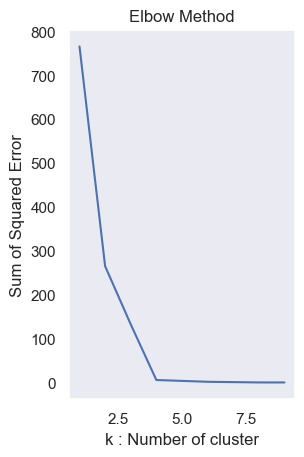

In [57]:
sse = {};sil = [];kmax = 10

plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(pca_df2)
    sse[k] = kmeans.inertia_ # Inertia: get the within-cluster sum of squares (WCSS) ie, sum of squared distance
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()